In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_inicial = pd.read_csv('/content/Enaho01-2020-100.csv', encoding='latin1')
df_inicial
# PARTICIPANTES
# BALDEON MORA ANDRES
# SAJIAN SHIRAZI VILA JASMEN
# TORRES PONTE VIVIANA
# NUESTRO OBJETIVO ES PREDECIR COMO EVOLUCIONA EL INDICE DE POBREZA

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,PERIODO,TIPENC,...,FACTOR07,FACTOR_P,RECHAZO_RAZONES,NCONGLOME,SUB_CONGLOME,CODCCPP,NOMCCPP,LONGITUD,LATITUD,ALTITUD
0,2020,1,5009,12,11,10101,4,4,1,3,...,149.202744,186.594396,,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
1,2020,1,5009,41,11,10101,4,4,1,3,...,149.202744,186.594396,,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
2,2020,1,5009,98,11,10101,4,4,1,3,...,149.202744,186.594396,,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
3,2020,1,5015,7,11,10101,4,4,1,1,...,70.492592,272.545638,,7089,0,1,CIUDAD CHACHAPOYAS,-77.867165,-6.231402,2361
4,2020,1,5015,19,11,10101,4,4,1,1,...,70.492592,272.545638,,7089,0,1,CIUDAD CHACHAPOYAS,-77.867165,-6.231402,2361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020,1,5357,59,11,30101,6,3,1,1,...,526.542053,898.565029,,36509,0,1,ASOCIACIÓN VECINAL SOL BRILLANTE,-72.893227,-13.640694,2274
196,2020,1,5357,101,11,30101,6,3,1,1,...,526.542053,898.565029,,36509,0,1,ASOCIACIÓN VECINAL MANUEL ESCORZA,-72.893227,-13.640694,2274
197,2020,1,5357,122,11,30101,6,3,1,1,...,526.542053,898.565029,,36509,0,1,ASOCIACIÓN VECINAL MANUEL ESCORZA,-72.893227,-13.640694,2274
198,2020,1,5357,146,11,30101,6,3,1,1,...,526.542053,898.565029,,36509,0,1,ASOCIACION VECINAL MANUEL ESCORZA,-72.893227,-13.640694,2274


In [47]:
df_final = df_inicial[['DOMINIO', 'P101', 'P102', 'P103', 'P103A', 'P110F', 'P112A', 'P110C', 'P110C2', 'P110C3']]
df_final.head()

,DOMINIO,P101,P102,P103,P103A,P110F,P112A,P110C,P110C2,P110C3
0,4,1,3,5,4,1,1,1,,
1,4,1,1,5,1,1,1,1,,
2,4,4,1,5,1,1,2,1,,
3,4,1,3,5,4,1,1,1,,
4,4,1,3,5,3,1,1,1,,


In [49]:
df_final.replace("", pd.NA, inplace=True)
df_final.replace(" ", pd.NA, inplace=True)

<ipython-input-49-9393b48a663b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.replace("", pd.NA, inplace=True)
<ipython-input-49-9393b48a663b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.replace(" ", pd.NA, inplace=True)


<Axes: >

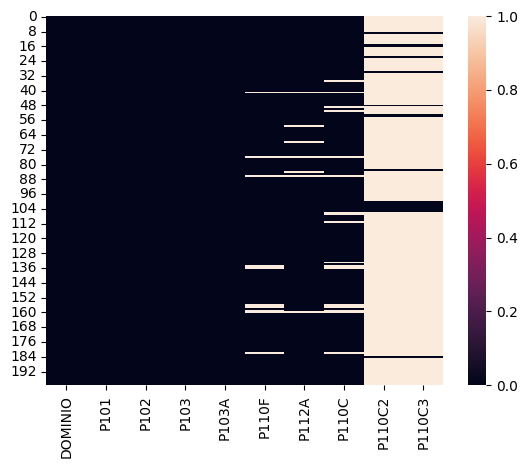

In [50]:
sns.heatmap(df_final.isnull())

<ipython-input-51-c2dc446ef647>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=['P110C2', 'P110C3'], inplace=True)


<Axes: >

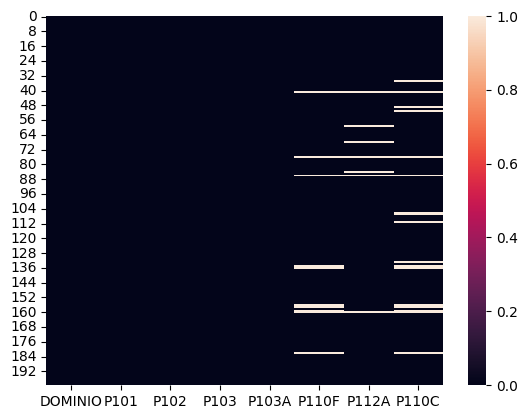

In [51]:
df_final.drop(columns=['P110C2', 'P110C3'], inplace=True)
sns.heatmap(df_final.isnull())

In [53]:
df_final.rename(columns={'P101':'TIPO_DE_VIVIENDA',
                         'P102':'MATERIAL_PARED_EXTERIOR',
                         'P103':'MATERIAL_PISO',
                         'P103A':'MATERIAL_TECHO',
                         'P110F':'PAGO_SERVICIO_AGUA',
                         'P112A':'ELECTRICO_EXCLUSIVO_COLECTIVO',
                         'P110C':'AGUA_SEMANA',}, inplace=True)


<ipython-input-53-92855a3b6c45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={'P101':'TIPO_DE_VIVIENDA',


In [54]:
mode_values = df_final.mode().iloc[0]
print(mode_values)

DOMINIO                          4
TIPO_DE_VIVIENDA                 1
MATERIAL_PARED_EXTERIOR          3
MATERIAL_PISO                    5
MATERIAL_TECHO                   4
PAGO_SERVICIO_AGUA               1
ELECTRICO_EXCLUSIVO_COLECTIVO    1
AGUA_SEMANA                      1
Name: 0, dtype: object


In [55]:
df_final.fillna(mode_values, inplace=True)

<ipython-input-55-4101365ef75b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.fillna(mode_values, inplace=True)


<Axes: >

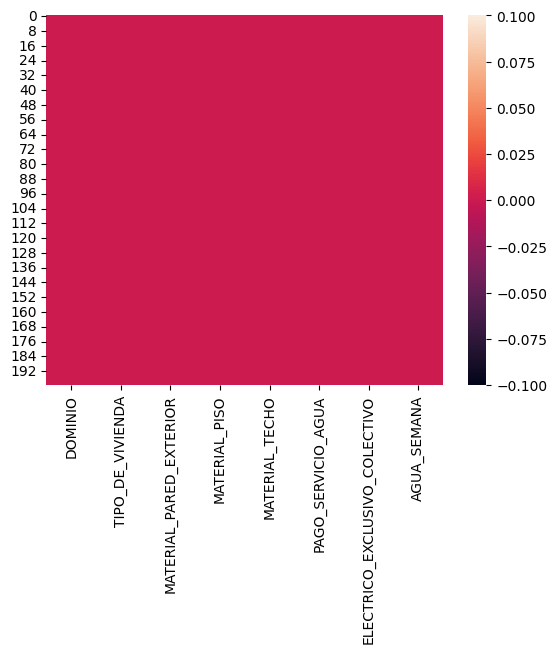

In [58]:
df_final.head()
sns.heatmap(df_final.isnull())